# Ensambles secuenciales

## Boosting

Boosting es una familia de algoritmos que buscan combinar estimadores (clasificadores o regresores) débiles de forma secuencial (cadena) para construir un estimador fuerte.

Estimador débil
: Algoritmo que produce un resultado (al menos) levemente mejor que el azar 

Estimador fuerte
: Algoritmo que produce un resultado correcto en la mayoría de los ejemplos

:::{epigraph}

Cualquier estimador débil puede ser mejorado (*boosted*) a un estimador fuerte

-- [Robert Shapire](https://link.springer.com/article/10.1007/BF00116037)

:::



El procedimiento general de un algoritmo de tipo boosting es:

1. Entrenar un estimador débil con toda la distribución de datos
1. Crear una nueva distribución que le da más peso a los errores del clasificador débil anterior
1. Entrenar otro estimador débil en la nueva distribución
1. Combinar los estimadores débiles y volver a 2

Estos pasos se muestran esquemáticamente en la siguiente figura para el caso particular de clasificación:

<img src="img/boosting.png" width="700">

:::{important}

El clasificador $H_2$ se encarga de corregir los errores de $H_1$. La combinación de $H_1$ y $H_2$ es el clasificador fuerte.

:::


Matemáticamente:

:::{prf:algorithm} Algoritmo general de Boosting

**Entradas** Un conjunto de datos $\mathcal{D}$ y un número máximo de estimadores $T$

1. Definir conjunto inicial $D_{1} = D$
1. Para $t = 1, \ldots, T$:
    1. Entrenar un estimador débil sobre $D_t$
    1. Evaluar el error del estimador débil
    1. Ponderar los ejemplos en base al error para crear $D_{t+1}$
1. Combinar las salidas de los estimadores débiles 

:::

En esta lección utilizaremos árboles de decisión como estimador débil. Esto define los pasos de entrenamiento y evaluación del algoritmo anterior. Sólo resta definir como:

- Crear $D_{t+1}$
- Combinar los estimadores débiles

A continuación veremos como definen estos puntos dos algoritmos particulares de Boosting.

## Adaptive Boosting (Adaboost)

[Adaboost](https://www.sciencedirect.com/science/article/pii/S002200009791504X) es un algoritmo diseñado para clasificación binaria $\{-1,1\}$ donde los clasificadores débiles se combinan linealmente como

$$
H_T(x) = \sum_{t=1}^T \alpha_t h_t(x)
$$

donde la clase predicha se obtiene aplicando la función signo sobre $H_T(x)$.

El ensamble se entrena minimizando la función de pérdida exponencial

$$
\begin{split}
\mathcal{L}(H_T) &= \sum_{i=1}^N \exp \left (-y_i H_T(x_i) \right) \\
&= \sum_{i=1}^N \exp \left (-y_i H_{T-1}(x_i) -y_i \alpha_T h_T(x_i)\right) \\
&= \sum_{i=1}^N w_i^{(T)}\exp \left (-y_i \alpha_T h_T(x_i)\right) 
\end{split}
$$

:::{note}

Para entrenar el último clasificador de la secuencia $h_T$ podemos asumir $w_i^{(T)}$ constante.

:::

Dividiendo la función de costo en los casos bien y mal clasificados

$$
\begin{split}
\mathcal{L}(H_T) &= \sum_{i=1}^N w_i^{(T)}\exp \left (-y_i \alpha_T h_T(x_i)\right) \\
&= \sum_{h(x_i)y_i = 1} e^{-\alpha_T} w_i^{(T)} + \sum_{h(x_i)y_i \neq 1} e^{\alpha_T} w_i^{(T)} 
\end{split}
$$

y luego derivando en función de $\alpha$ se tiene

$$
\alpha_t = \frac{1}{2} \log \left(\frac{1-\epsilon_t}{\epsilon_t} \right),
$$

donde

$$
\epsilon_t = \frac{\sum_{i=1}^N w_i^{(T)} \mathbb{1}(h_t(x_i)\neq y_i)}{\sum_{i=1}^N w_i^{(T)}}
$$

donde $\mathbb{1}()$ es la función indicadora que es 1 si su argumento es cierto o 0 en caso contrario.

Con esto tenemos

:::{prf:algorithm} Algoritmo Adaptive Boosting

**Entradas** Un conjunto de datos $\mathcal{D}$ y un número máximo de estimadores $T$

1. Inicializar los pesos $w_i^{(1)} = 1/N$
1. Para $t = 1, \ldots, T$:
    1. Entrenar un estimador débil $h_t$ sobre los datos ponderados por $w_i^{(t)}$
    1. Calcular $\alpha_t$
    1. Actualizar los pesos $w_i^{(t+1)} = w_i^{(t)} \exp (2 \alpha_t \mathbb{1}(h_t(x_i) \neq y_i))$
    
:::

El clasificador fuerte está totalmente definido por los clasificadores débiles $h_t$ y los ponderadores $\alpha_t$.

:::{note}

Los pesos de los datos se actualizan con los errores del último clasificador.

:::

:::{important}

Los ensambles de tipo boosting reducen progresivamente el sesgo (error) agregando secuencialmente clasificadores débiles.

:::

## Gradient Boosting

El algoritmo de [gradient boosting](https://projecteuclid.org/journals/annals-of-statistics/volume-29/issue-5/Greedy-function-approximation-A-gradient-boostingmachine/10.1214/aos/1013203451.full) combina el método de gradiente descendente con el algoritmo general de boosting. Es capaz de hacer tanto clasificación como regresión y puede usar cualquier función de pérdida que sea derivable.

Sea una función de costo sobre un dataset $(x_i, y_i)_{i=1,\ldots,N}$

$$
\min \sum_{i=1}^N L(y_i, H_T(x_i)),
$$

donde $H_T$ es el estimador fuerte.

Por ejemplo, en un problema de regresión, este se define como

$$
H_T(x_i) = \sum_{t=1}^T h_t(x_i),
$$

es decir una suma de "regresores" débiles.

En un problema de regresión se utiliza típicamente el error cuadrático medio como función de costo

$$
L(H_T(x_i), y_i) = \frac{1}{2} \left(y_i - H_T(x_i) \right)^2
$$

Supongamos que tenemos $H_3 = h_1 + h_2 + h_3$ y deseamos agregar un nuevo estimador tal que

$$
H_4 = H_3 + h_4
$$

:::{note}

Los estimadores se agregan de uno por uno de forma *greedy*.

:::

Agregar el nuevo estimador debería acercar al estimador fuerte a la etiqueta es decir

$$
H_3 + h_4 \approx y
$$

Para lograr esto el nuevo estimador $h_4$ se entrena **minimizando el residuo** $y-H_3$

$$
h_4 = \text{arg} \min_{h} \sum_{i=1}^N L(h(x_i), y_i - H_3(x_i))
$$

donde el residuo está relacionado a 

$$
\frac{dL(H_3(x_i), y_i)}{dH_3(x_i)} = H_3(x_i) - y_i
$$

:::{note}

Si utilizamos el error cuadrático, entonces los residuos son equivalentes al negativo del gradiente, esta es la razón del nombre del algoritmo.

:::

Para reducir el sobreajuste del ensamble (regularización) se agrega típicamente

$$
H_{t+1} = H_t + \nu h_t
$$

una constate $\nu$ denominada tasa de aprendizaje. Esto disminuye la contribución de cada estimador débil (enlentece el entrenamiento).

:::{note}

En general una tasa de aprendizaje pequeña requerirá una mayor cantidad de clasificadores débiles. La ventaja de una tasa pequeña es que está relacionada a menores errores en el conjunto de test .

:::

Para problemas de clasificación con $K$ clases se suele utilizar la siguiente función de costo, llamada generalmente *logarithmic loss* o *log loss*

$$
L(y_i, x_i) = \sum_{k=1}^K y_{ik} \log p_k (x_i)
$$

donde $y_i$ es un vector de largo K de tipo *one-hot* y $H(x)$ retorna también un vector de largo $K$ que se normaliza como

$$
p_k(x) = \frac{e^{H^{(k)}(x)}}{ \sum_{k=1}^K e^{H^{(k)}(x)} }
$$

tal que cada componente este en el rango $[0,1]$ y que además los $K$ sumen uno.

## Implementación en `scikit-learn`

El módulo [`ensemble`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) de scikit-learn tiene implementaciones de *Gradient Boosting* para problemas de clasificación y regresión. Nos enfocaremos en la primera.

Los principales argumentos de [`GradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) son:

- `loss`: La función de costo. Las opciones son `'log_loss'` (dependiendo de su versión de scikit-learn) o `'exponential'`
- `n_estimators:` Cantidad de clasificadores débiles
- `learning_rate`: Tasa de aprendizaje (no-negativo)
- `subsample`: Booleano que indica si cada clasificador débil utiliza el dataset completo o una submuestra


:::{note}

Si se utiliza `loss='exponential'` el algoritmo se vuelve equivalente a *AdaBoost* (sólo para clasificación binaria).

:::

También recibe argumentos relacionados a los clasificadores débiles (árboles), entre ellos:

- `max_depth`: Profundidad máxima de los árboles
- `min_samples_split`: Número mínimo de muestras para permitir un `split`

El objeto tiene implementados los métodos usuales `fit`, `predict`, `predict_proba` y `decision_function`.

Adicionalmente cuenta con `staged_predict`, `staged_predict_proba` y `staged_decision_function`, que retornan las predicciones de los clasificadores débiles individuales.


In [1]:
import sklearn
print(sklearn.__version__)

1.2.2


**Ejemplo:** 

Entrenamiento de ensamble gradient boosting para clasificación de vino

In [2]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

data_struct = load_wine()
X = data_struct.data
y = data_struct.target
X_names = data_struct.feature_names

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)

Se realiza una validación cruzada buscando los mejores hiperparámetros del modelo:

In [3]:
%%time

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

params = {'learning_rate': [0.1, 0.2, 0.5], 
          'max_depth': [1, 5, 10, 20],
          'n_estimators': [1, 10, 20, 50, 100]}

model = GradientBoostingClassifier(loss='log_loss')
validator = GridSearchCV(model, params, cv=3, refit=True)
validator.fit(X_train, y_train)

CPU times: user 24 s, sys: 6.92 ms, total: 24 s
Wall time: 24.1 s


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.5],
                         'max_depth': [1, 5, 10, 20],
                         'n_estimators': [1, 10, 20, 50, 100]})

Los mejores modelos de acuerdo a la validación cruzada son:

In [4]:
import pandas as pd
columns = ["param_learning_rate", "param_max_depth", "param_n_estimators", 
           "mean_test_score", "std_test_score", "rank_test_score"]
pd.DataFrame(validator.cv_results_)[columns].sort_values(by="rank_test_score").head(5)

,param_learning_rate,param_max_depth,param_n_estimators,mean_test_score,std_test_score,rank_test_score
24,0.2,1,100,0.959930,0.022174,1
41,0.5,1,10,0.959930,0.022174,1
21,0.2,1,10,0.951994,0.033398,3
42,0.5,1,20,0.951994,0.033398,3
23,0.2,1,50,0.944057,0.044622,5


En este caso hay varios modelos que obtuvieron el primer lugar en términos de *accuracy* promedio

`GridSearchCV` retorna arbitrariamente el primero en orden de ejecución:

In [5]:
validator.best_params_

{'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 100}

:::{note}

Boosting funciona bien con árboles poco profundos. Los árboles de poca profundidad suelen tener alto sesgo y baja varianza.

:::

El resultado de predicción en el conjunto de test es:

In [6]:
from sklearn.metrics import classification_report

best_gb = validator.best_estimator_
print(classification_report(y_test, best_gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.95      0.98        22
           2       1.00      1.00      1.00        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



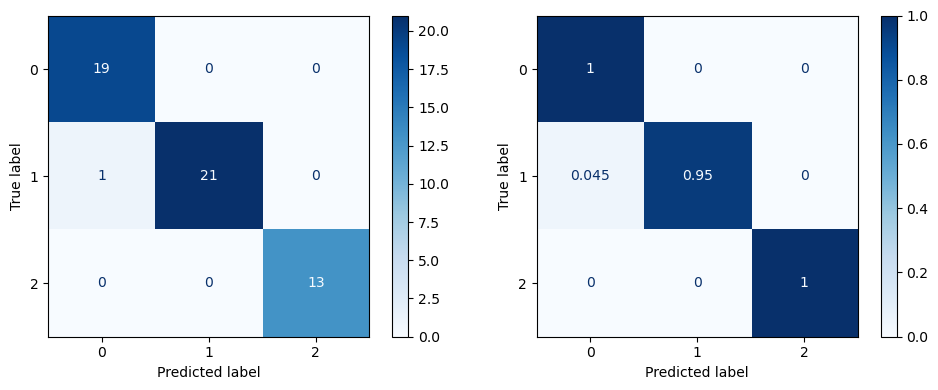

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)

ConfusionMatrixDisplay.from_predictions(y_test, validator.predict(X_test), normalize=None,
                                        ax=ax[0], cmap='Blues', colorbar=True);

ConfusionMatrixDisplay.from_predictions(y_test, validator.predict(X_test), normalize='true',
                                        ax=ax[1], cmap='Blues', colorbar=True);

:::{seealso}

Otros algoritmos de Boosting con árboles de decisión extremadamente competitivos:

- [HistGradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html#sklearn.ensemble.HistGradientBoostingClassifier)
- [XGBoost](http://dmlc.cs.washington.edu/xgboost.html)
- [LightGBM](https://lightgbm.readthedocs.io/en/latest/index.html)

Estos implementan estrategias para mejorar la eficiencia y realizar cálculos paralelos/distribuidos.

:::